# Terrestiral Planets: Adding a Surface

Three major changes differences you need to make note of for terrestrial planets in both reflected, emission and transmission geometry: 

1. Adding a surface reflectivity 
2. Ensuring the code knows that your lower boundary condition is a hard surface 
3. Ensuring that the reference pressure is lower than the lower pressure of your surface. `PICASO` default is 1 bar, which is often times too high.

In [1]:
import pandas as pd
import numpy as np
#picaso
from picaso import justdoit as jdi 
from picaso import justplotit as jpi
#plotting
jpi.output_notebook()

Loading BokehJS ...

### Connect to Opacity Database

In [2]:
opacity = jdi.opannection(wave_range=[0.3,1])

In [6]:
dir(opacity)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_query_continuum',
 '_get_query_molecular',
 'adapt_array',
 'avail_continuum',
 'cia_temps',
 'compute_stellar_shits',
 'convert_array',
 'db_connect',
 'db_filename',
 'find_needed_pts',
 'gauss_wts',
 'get_available_data',
 'get_available_rayleigh',
 'get_opacities',
 'get_opacities_nearest',
 'loc',
 'molecules',
 'nc_p',
 'ngauss',
 'nwno',
 'open_local',
 'p_log_grid',
 'preload',
 'preload_opacities',
 'pressures',
 'pt_pairs',
 'raman_db',
 'rayleigh_molecules',
 'rayleigh_opa',
 'resample',
 't_inv_grid',
 'temps',
 'unshifted_stellar_spec',
 'wave',
 'wno']

### Load blank slate

In [4]:
sum_planet = jdi.inputs()

### Set Planet & Star Properties 

In [5]:
#phase angle 
sum_planet.phase_angle(0) #radians

#define gravity
sum_planet.gravity(gravity=9.8, gravity_unit=jdi.u.Unit('m/(s**2)')) #any astropy units available

#define star 
sum_planet.star(opacity,5000,0,4.0) #pysynphot database, temp, metallicity, logg 

## Add Surface Reflectivity

For reflected light it is important to specify the surface albedo in case there are wavelength bands that are optically thin from molecular absorption. In those cases you will see the surface reflection in your spectra. 

For emission, it is important the surface reflectivity routine also tells the code that you have a "hard surface" boundary condition (opposed to a high pressure surface). Therefore if you are running reflected light, or thermal emission you will have to run the `surface_reflect` routine. 

**Therefore, it is critical that you run this routine for all terrestrial cases (reflected light and thermal emission**

In [8]:
sum_planet.atmosphere(df=pd.DataFrame({'pressure':np.logspace(-6,0,40),
                         'temperature':np.linspace(100,270,40), #very fake temperature profile with a 270 K suface
                         'H2O':np.zeros(40)+0.01,
                         'CO2':np.zeros(40)+1-0.01}))

sum_planet.surface_reflect(0.3,opacity.wno) #this inputs the surface reflectivity and tells the code 
                                            #there is a hard surface

    
#can also input a wavelength dependent quantity here
#fake_surface= np.linspace(0.01,0.9, opacity.nwno)
#sum_planet.surface_reflect(fake_surface,opacity.wno)

Turning off Raman for Non-H2 atmosphere


In [9]:
sum_planet.inputs['atmosphere']['profile']

,pressure,temperature,H2O,CO2
0,0.000001,100.000000,0.01,0.99
1,0.000001,104.358974,0.01,0.99
2,0.000002,108.717949,0.01,0.99
3,0.000003,113.076923,0.01,0.99
4,0.000004,117.435897,0.01,0.99
5,0.000006,121.794872,0.01,0.99
6,0.000008,126.153846,0.01,0.99
7,0.000012,130.512821,0.01,0.99
8,0.000017,134.871795,0.01,0.99
9,0.000024,139.230769,0.01,0.99


<IPython.core.display.Javascript object>


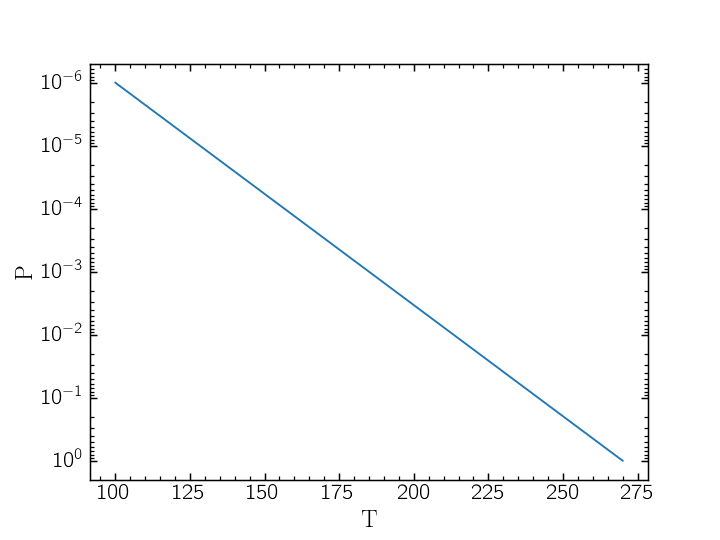

Text(0, 0.5, 'P')

In [10]:
p = sum_planet.inputs['atmosphere']['profile']['pressure']
t = sum_planet.inputs['atmosphere']['profile']['temperature']
%matplotlib notebook
plt.plot(t,p)
plt.gca().set_yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('T')
plt.ylabel('P')


In [11]:
sum_planet.inputs['star']

{'database': 'ck04models',
 'temp': 5000,
 'metal': 0,
 'logg': 4.0,
 'radius': nan,
 'radius_unit': 'Radius not supplied',
 'flux': array([2.18833381e+14, 2.18882030e+14, 2.18930683e+14, ...,
        3.65266675e+13, 3.66106507e+13, 3.66946422e+13]),
 'wno': array([10000.41805245, 10001.41814426, 10002.41833609, ...,
        33325.63422262, 33328.96695267, 33332.30001602]),
 'semi_major': nan,
 'semi_major_unit': 'Semi Major axis not supplied'}

<IPython.core.display.Javascript object>


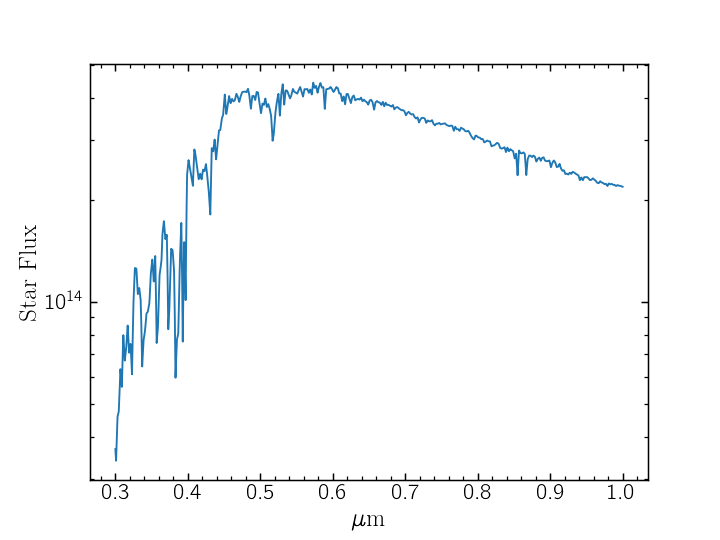

Text(0, 0.5, 'Star Flux')

In [12]:
um = 1e4/sum_planet.inputs['star']['wno']
f = sum_planet.inputs['star']['flux']
%matplotlib notebook
plt.plot(um,f)
plt.gca().set_yscale('log')
plt.xlabel(r'$\mu$m')
plt.ylabel('Star Flux')

In [13]:
sum_planet.inputs['phase_angle']

0

In [14]:
dir(sum_planet)

['TP_line_earth',
 'T_eff',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_pt',
 'approx',
 'atmosphere',
 'atmosphere_3d',
 'atmosphere_4d',
 'channon_grid_high',
 'channon_grid_low',
 'chem_interp',
 'chemeq_3d',
 'chemeq_deprecate',
 'chemeq_visscher',
 'climate',
 'clouds',
 'clouds_3d',
 'clouds_4d',
 'clouds_reset',
 'effective_temp',
 'gravity',
 'guillot_pt',
 'inputs',
 'inputs_climate',
 'nlevel',
 'old_run_climate_model',
 'phase_angle',
 'phase_curve',
 'phase_curve_geometry',
 'premix_3d',
 'premix_atmosphere',
 'premix_atmosphere_diseq',
 'run_vulcan',
 'setup_climate',
 'setup_nostar',
 'sonora',
 'spectrum',
 'star',
 'surface_reflect',
 'virga',


Note you can turn off these printout messages with `verbose=False` in the `atmosphere` function

## Create 1D Albedo Spectrum

In [15]:
opacity

In [16]:
df = sum_planet.spectrum(opacity)

In [21]:
df

{'wavenumber': array([10000.41805245, 10001.41814426, 10002.41833609, ...,
        33325.63422262, 33328.96695267, 33332.30001602]),
 'albedo': array([0.20486568, 0.20596991, 0.20022217, ..., 0.4667631 , 0.46682345,
        0.46688381]),
 'bond_albedo': 0.2264855947434371,
 'fpfs_reflected': ['Semi-major axis not supplied. If you want fpfs, add it to `star` function. ',
  'Planet Radius not supplied. If you want fpfs, add it to `gravity` function with a mass.']}

<IPython.core.display.Javascript object>


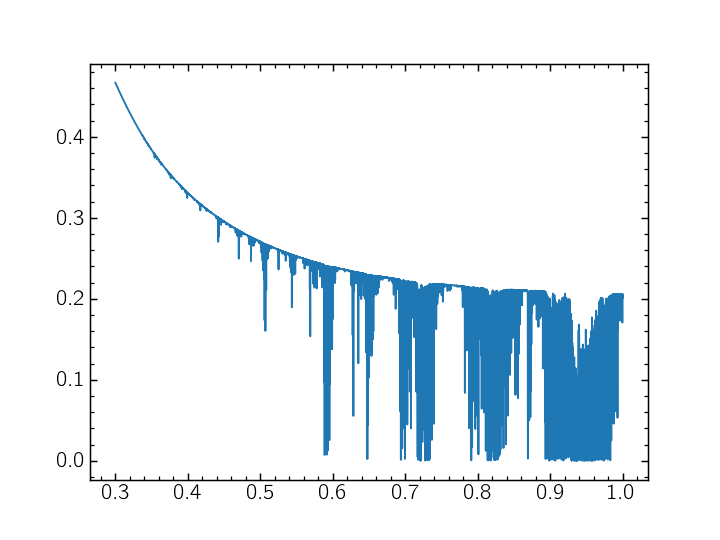

In [23]:
%matplotlib notebook
plt.plot(1e4/df['wavenumber'],df['albedo'])

In [19]:
wno, alb, fpfs = df['wavenumber'],df['albedo'],df['fpfs_reflected']
wno, alb = jpi.mean_regrid(wno, alb, R=150)

In [25]:
jpi.show(jpi.spectrum([wno], [alb], plot_width=500))

What about contrast units? 

In [26]:
fpfs

['Semi-major axis not supplied. If you want fpfs, add it to `star` function. ',
 'Planet Radius not supplied. If you want fpfs, add it to `gravity` function with a mass.']

### Get Contrast Units  

In order to get contrast units we have to make sure to give the `gravity` and `star` functions semi major axis, mass and radius.

In [32]:
sum_planet.star(opacity,5000,0,4.0,semi_major=1, semi_major_unit=jdi.u.Unit('au')) 
sum_planet.gravity(radius=1.,radius_unit=jdi.u.Unit('R_earth'), 
             mass=1,mass_unit=jdi.u.Unit('M_earth')) 
df = sum_planet.spectrum(opacity)
wno, alb, fpfs = df['wavenumber'],df['albedo'],df['fpfs_reflected']
wno, fpfs = jdi.mean_regrid(wno, fpfs , R=1500)


In [34]:
jpi.show(jpi.spectrum([wno], [fpfs], plot_width=500))

<IPython.core.display.Javascript object>


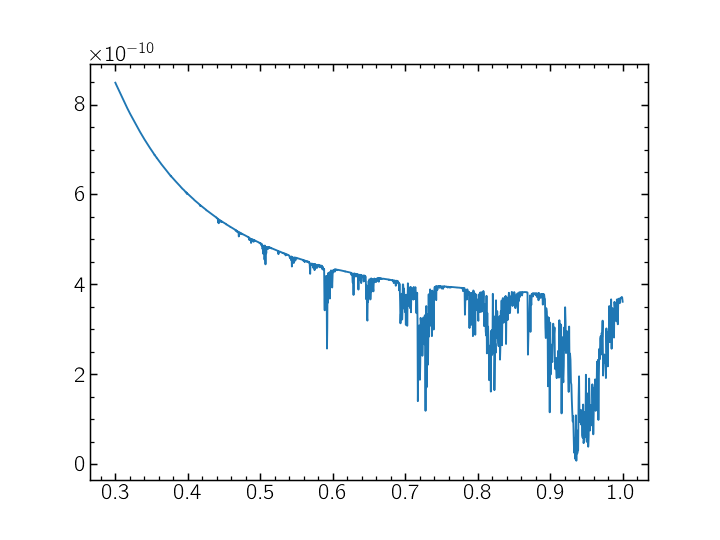

In [35]:
%matplotlib notebook
plt.plot(1e4/wno, fpfs)